## Review of Lambda Functions

A lamda function is used to define an operation in-line. A lambda function is an anonymous function, meaning that it does not need a name.

You can make a Lambda function with a simple one line expression. 

<code>lambda parameters : expression</code>

Note that lambda functions do not use the return keyword, you just specify the name and value(s) of the parameters of the function, a colon, and the operation to perform on the parameters.

The lambda function can also be used with other functions.

The best way to understand the lambda function is to see it being used.

In [1]:
x = lambda a : a + 7 # Notice that this is a one line expression
print (x(5))

y = lambda a, b, c : a * b * c
print (y(2,3,4))

z = lambda a : a * 3
print(z("Happy birthday to you!" + "\n"))
print (z(5))

12
24
Happy birthday to you!
Happy birthday to you!
Happy birthday to you!

15


In [2]:
my_list = [3, 4, 64, 2, 45, 23, 12, 34, 146]

for value in map(lambda x: 2 * x, my_list): # Don't need a separate function.
    print(value)

6
8
128
4
90
46
24
68
292


In [3]:
my_list = [3, 4, 64, 2, 45, 23, 12, 34, 146]

for value in map(lambda x: "high" if x > 10 else "low", my_list): 
    print(value)

low
low
high
low
high
high
high
high
high


## Back to Pandas 

In [4]:
# Setup our workspace

# Render our plots inline
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Make the graphs a bit prettier, and bigger
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 7)

In [5]:
data_file = 'cmpd_Incident_2016.csv';
# Read data
crime_df = pd.read_csv(data_file,encoding = "ISO-8859-1")

In [6]:
# what fields do we have?
crime_df.columns

Index(['Complaint_No', 'Block_No', 'Direction', 'Street_Name', 'Street_Type',
       'Suffix', 'Apt_No', 'City', 'State', 'Zipcode', 'X_Coordinate',
       'Y_Coordinate', 'Division', 'Reported_Date', 'Location_Desc',
       'Location_Type', 'Incident_From_Date', 'Incident_From_Time',
       'Incident_to_date', 'Incident_to_Time', 'Place1', 'Place2',
       'Clearance_Status', 'Clearance_Date', 'Case_Status', 'Reporting_Agency',
       'NIBRS_Hi_Class'],
      dtype='object')

In [7]:
# how big is our data?
crime_df.shape

(99857, 27)

### The Index Field

In [8]:
crime_df

,Complaint_No,Block_No,Direction,Street_Name,Street_Type,Suffix,Apt_No,City,State,Zipcode,...,Incident_From_Time,Incident_to_date,Incident_to_Time,Place1,Place2,Clearance_Status,Clearance_Date,Case_Status,Reporting_Agency,NIBRS_Hi_Class
0,2.020000e+13,2219,,HEATHER GLEN,LN,,,CHARLOTTE,NC,28208,...,1930,12/31/15,2330.0,Residential,Private Residence ...,Open ...,,Further Investigation,Charlotte-Mecklenburg Police Department,Motor Vehicle Theft
1,2.020000e+13,8120,E,W T HARRIS,BV,,,CHARLOTTE,NC,28215,...,1,NaN,NaN,Open Area,Street/Highway ...,Open ...,,Inactive,Charlotte-Mecklenburg Police Department,Hit And Run (Property Only)
2,2.020000e+13,1415,,TOM HUNTER,RD,,220,CHARLOTTE,NC,28213,...,0,NaN,NaN,Commercial Place,Hotel/Motel ...,Normal Clearance - Cleared by Arrest ...,1/1/16,Close/Cleared,Charlotte-Mecklenburg Police Department,Simple Assault
3,2.020000e+13,,,ORR,RD,,58,CHARLOTTE,NC,,...,0,1/1/16,6.0,Residential,Mobile Home/Houseboat ...,Open ...,,Inactive,Charlotte-Mecklenburg Police Department,Aggravated Assault
4,2.020000e+13,6500,N,TRYON,ST,,,CHARLOTTE,NC,28213,...,5,1/1/16,6.0,Open Area,Street/Highway ...,Open ...,,Inactive,Charlotte-Mecklenburg Police Department,Aggravated Assault
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99852,2.020000e+13,118,S,CHURCH,ST,,,CHARLOTTE,NC,28202,...,2339,12/31/16,2340.0,Commercial Place,Other - Commercial Place ...,Open ...,,Inactive,Charlotte-Mecklenburg Police Department,Robbery
99853,2.020000e+13,7321,N,TRYON,ST,,,CHARLOTTE,NC,28213,...,2330,12/31/16,2342.0,Commercial Place,Bar/Tavern/Nightclub ...,Open ...,,Inactive,Charlotte-Mecklenburg Police Department,Theft From Motor Vehicle
99854,2.020000e+13,3826,,MOSSCROFT,LN,,,CHARLOTTE,NC,28215,...,2315,12/31/16,2325.0,Residential,Private Residence ...,Open ...,,Further Investigation,Charlotte-Mecklenburg Police Department,Theft From Motor Vehicle
99855,2.020000e+13,2811,,CLYDE,DR,,,CHARLOTTE,NC,28208,...,2350,NaN,NaN,Residential,Private Residence ...,Open ...,,Inactive,Charlotte-Mecklenburg Police Department,Damage/Vandalism Of Property


Do you notice the leftmost column?

It is auto-generated index column, because pandas always tries to optimize every dataset it handles, so However, that auto-generated index field starts from 0 and unnamed. We need to update it.it generated.

However, that auto-generated index field starts from 0 and is unnamed. It is good practice to update that.

This can be done by manipulating the DataFrame.index property.
Okay, let’s update the index field with number starting from 1.

The DataFrame.index is a list, so we can generate it easily using list comprehension.

In [9]:
crime_df.index = [x for x in range(1, len(crime_df.values)+1)]

In [10]:
crime_df

,Complaint_No,Block_No,Direction,Street_Name,Street_Type,Suffix,Apt_No,City,State,Zipcode,...,Incident_From_Time,Incident_to_date,Incident_to_Time,Place1,Place2,Clearance_Status,Clearance_Date,Case_Status,Reporting_Agency,NIBRS_Hi_Class
1,2.020000e+13,2219,,HEATHER GLEN,LN,,,CHARLOTTE,NC,28208,...,1930,12/31/15,2330.0,Residential,Private Residence ...,Open ...,,Further Investigation,Charlotte-Mecklenburg Police Department,Motor Vehicle Theft
2,2.020000e+13,8120,E,W T HARRIS,BV,,,CHARLOTTE,NC,28215,...,1,NaN,NaN,Open Area,Street/Highway ...,Open ...,,Inactive,Charlotte-Mecklenburg Police Department,Hit And Run (Property Only)
3,2.020000e+13,1415,,TOM HUNTER,RD,,220,CHARLOTTE,NC,28213,...,0,NaN,NaN,Commercial Place,Hotel/Motel ...,Normal Clearance - Cleared by Arrest ...,1/1/16,Close/Cleared,Charlotte-Mecklenburg Police Department,Simple Assault
4,2.020000e+13,,,ORR,RD,,58,CHARLOTTE,NC,,...,0,1/1/16,6.0,Residential,Mobile Home/Houseboat ...,Open ...,,Inactive,Charlotte-Mecklenburg Police Department,Aggravated Assault
5,2.020000e+13,6500,N,TRYON,ST,,,CHARLOTTE,NC,28213,...,5,1/1/16,6.0,Open Area,Street/Highway ...,Open ...,,Inactive,Charlotte-Mecklenburg Police Department,Aggravated Assault
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99853,2.020000e+13,118,S,CHURCH,ST,,,CHARLOTTE,NC,28202,...,2339,12/31/16,2340.0,Commercial Place,Other - Commercial Place ...,Open ...,,Inactive,Charlotte-Mecklenburg Police Department,Robbery
99854,2.020000e+13,7321,N,TRYON,ST,,,CHARLOTTE,NC,28213,...,2330,12/31/16,2342.0,Commercial Place,Bar/Tavern/Nightclub ...,Open ...,,Inactive,Charlotte-Mecklenburg Police Department,Theft From Motor Vehicle
99855,2.020000e+13,3826,,MOSSCROFT,LN,,,CHARLOTTE,NC,28215,...,2315,12/31/16,2325.0,Residential,Private Residence ...,Open ...,,Further Investigation,Charlotte-Mecklenburg Police Department,Theft From Motor Vehicle
99856,2.020000e+13,2811,,CLYDE,DR,,,CHARLOTTE,NC,28208,...,2350,NaN,NaN,Residential,Private Residence ...,Open ...,,Inactive,Charlotte-Mecklenburg Police Department,Damage/Vandalism Of Property


Next we can set a name for the index field through simple assignment:

In [11]:
# add index field name
crime_df.index.name = 'id'
crime_df

,Complaint_No,Block_No,Direction,Street_Name,Street_Type,Suffix,Apt_No,City,State,Zipcode,...,Incident_From_Time,Incident_to_date,Incident_to_Time,Place1,Place2,Clearance_Status,Clearance_Date,Case_Status,Reporting_Agency,NIBRS_Hi_Class
id,,,,,,,,,,,,,,,,,,,,,
1,2.020000e+13,2219,,HEATHER GLEN,LN,,,CHARLOTTE,NC,28208,...,1930,12/31/15,2330.0,Residential,Private Residence ...,Open ...,,Further Investigation,Charlotte-Mecklenburg Police Department,Motor Vehicle Theft
2,2.020000e+13,8120,E,W T HARRIS,BV,,,CHARLOTTE,NC,28215,...,1,NaN,NaN,Open Area,Street/Highway ...,Open ...,,Inactive,Charlotte-Mecklenburg Police Department,Hit And Run (Property Only)
3,2.020000e+13,1415,,TOM HUNTER,RD,,220,CHARLOTTE,NC,28213,...,0,NaN,NaN,Commercial Place,Hotel/Motel ...,Normal Clearance - Cleared by Arrest ...,1/1/16,Close/Cleared,Charlotte-Mecklenburg Police Department,Simple Assault
4,2.020000e+13,,,ORR,RD,,58,CHARLOTTE,NC,,...,0,1/1/16,6.0,Residential,Mobile Home/Houseboat ...,Open ...,,Inactive,Charlotte-Mecklenburg Police Department,Aggravated Assault
5,2.020000e+13,6500,N,TRYON,ST,,,CHARLOTTE,NC,28213,...,5,1/1/16,6.0,Open Area,Street/Highway ...,Open ...,,Inactive,Charlotte-Mecklenburg Police Department,Aggravated Assault
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99853,2.020000e+13,118,S,CHURCH,ST,,,CHARLOTTE,NC,28202,...,2339,12/31/16,2340.0,Commercial Place,Other - Commercial Place ...,Open ...,,Inactive,Charlotte-Mecklenburg Police Department,Robbery
99854,2.020000e+13,7321,N,TRYON,ST,,,CHARLOTTE,NC,28213,...,2330,12/31/16,2342.0,Commercial Place,Bar/Tavern/Nightclub ...,Open ...,,Inactive,Charlotte-Mecklenburg Police Department,Theft From Motor Vehicle
99855,2.020000e+13,3826,,MOSSCROFT,LN,,,CHARLOTTE,NC,28215,...,2315,12/31/16,2325.0,Residential,Private Residence ...,Open ...,,Further Investigation,Charlotte-Mecklenburg Police Department,Theft From Motor Vehicle


### Misleading Values

#### To Do: Which block has the most number of reported incidents?

In [12]:
most_incidents_block = crime_df['Block_No'].value_counts().idxmax()
most_incidents_count = crime_df['Block_No'].value_counts().max()

print(f"Block with the most incidents: {most_incidents_block} (Number of incidents: {most_incidents_count})")

Block with the most incidents:         (Number of incidents: 5687)


#### To Do: What problem in the dataset does this highlight?

In [ ]:
## How many rows have missing values?

#### To Do: How can this problem be addressed?

In [ ]:
## Fill in missing values

#### To Do: The dataset includes additional fields where the values are empty strings. Update the data frame so that those values are properly coded to indicate there are no values for entries.

In [14]:
## Drop rows with missing values
crime_df.replace('', np.nan, inplace=True)
crime_df.isnull().sum()

Complaint_No              0
Block_No                  0
Direction                 0
Street_Name               0
Street_Type               0
Suffix                    0
Apt_No                    0
City                      0
State                     0
Zipcode                   0
X_Coordinate              0
Y_Coordinate              0
Division                  0
Reported_Date             0
Location_Desc             0
Location_Type             0
Incident_From_Date        0
Incident_From_Time        0
Incident_to_date      26576
Incident_to_Time      26576
Place1                    0
Place2                    0
Clearance_Status          0
Clearance_Date            0
Case_Status               0
Reporting_Agency          0
NIBRS_Hi_Class            0
dtype: int64

### Analyzing a Specific Crime

What if we were interested in incidents with a classification related to Theft.

In [15]:
# Analyzing a pecific Crime
crime_type = crime_df['NIBRS_Hi_Class']
is_theft = crime_type.str.contains('Theft')

#### To Do: How many incidents do we have with a classifictation related to Theft? 

In [17]:
theft_incidents_count = is_theft.sum()
print(f"Number of incidents classified as related to 'Theft': {theft_incidents_count}")

Number of incidents classified as related to 'Theft': 25245


### Reexperssing Field Values

How about if we want to get a sense of the distribution of incidents over the months of the year? Do have the necessary data to accomplish this?
If we look at our fields we can see the Reported_Date field includes this data but not in the format we want.

First let us check the datatype of the field:

In [18]:
type(crime_df['Reported_Date'][1]) 

str

Notice that we are using index 1 because we remapped the index for this dataframe to start at 1 rather than 0.
Now that we know the datatype for this field is a string we can use string methods to create a new mapping:

In [19]:
crime_df['Month'] = crime_df['Reported_Date'].str.split("/", expand = True)[0]

What we've done here is split each field string value using the "/" character and used the first element from this split as the value for the new column/field ("Month") we are creating. Setting the expand to True returns a data frame with different value in different columns. The Data frame is then used to create the new column.

In [20]:
crime_df

,Complaint_No,Block_No,Direction,Street_Name,Street_Type,Suffix,Apt_No,City,State,Zipcode,...,Incident_to_date,Incident_to_Time,Place1,Place2,Clearance_Status,Clearance_Date,Case_Status,Reporting_Agency,NIBRS_Hi_Class,Month
id,,,,,,,,,,,,,,,,,,,,,
1,2.020000e+13,2219,,HEATHER GLEN,LN,,,CHARLOTTE,NC,28208,...,12/31/15,2330.0,Residential,Private Residence ...,Open ...,,Further Investigation,Charlotte-Mecklenburg Police Department,Motor Vehicle Theft,1
2,2.020000e+13,8120,E,W T HARRIS,BV,,,CHARLOTTE,NC,28215,...,NaN,NaN,Open Area,Street/Highway ...,Open ...,,Inactive,Charlotte-Mecklenburg Police Department,Hit And Run (Property Only),1
3,2.020000e+13,1415,,TOM HUNTER,RD,,220,CHARLOTTE,NC,28213,...,NaN,NaN,Commercial Place,Hotel/Motel ...,Normal Clearance - Cleared by Arrest ...,1/1/16,Close/Cleared,Charlotte-Mecklenburg Police Department,Simple Assault,1
4,2.020000e+13,,,ORR,RD,,58,CHARLOTTE,NC,,...,1/1/16,6.0,Residential,Mobile Home/Houseboat ...,Open ...,,Inactive,Charlotte-Mecklenburg Police Department,Aggravated Assault,1
5,2.020000e+13,6500,N,TRYON,ST,,,CHARLOTTE,NC,28213,...,1/1/16,6.0,Open Area,Street/Highway ...,Open ...,,Inactive,Charlotte-Mecklenburg Police Department,Aggravated Assault,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99853,2.020000e+13,118,S,CHURCH,ST,,,CHARLOTTE,NC,28202,...,12/31/16,2340.0,Commercial Place,Other - Commercial Place ...,Open ...,,Inactive,Charlotte-Mecklenburg Police Department,Robbery,12
99854,2.020000e+13,7321,N,TRYON,ST,,,CHARLOTTE,NC,28213,...,12/31/16,2342.0,Commercial Place,Bar/Tavern/Nightclub ...,Open ...,,Inactive,Charlotte-Mecklenburg Police Department,Theft From Motor Vehicle,12
99855,2.020000e+13,3826,,MOSSCROFT,LN,,,CHARLOTTE,NC,28215,...,12/31/16,2325.0,Residential,Private Residence ...,Open ...,,Further Investigation,Charlotte-Mecklenburg Police Department,Theft From Motor Vehicle,12


Now that we have the Month field values represented with a number corresponding to the month of the year we can reexpress them using the month's name.

To do that we need to first create a dictionary that maps  the variable's original value  to the variable's new value:


In [21]:
dict_month = {"Month":{"1":"January", "2":"February", "3":"March", "4":"April", 
                       "5":"May", "6":"June","7": "July", "8":"August", "9":"September", 
                       "10":"October", "11":"November", "12":"December"}}

Finally, we use the dictionary to replace the variable’s values:

In [22]:
crime_df.replace(dict_month, inplace=True)
crime_df

,Complaint_No,Block_No,Direction,Street_Name,Street_Type,Suffix,Apt_No,City,State,Zipcode,...,Incident_to_date,Incident_to_Time,Place1,Place2,Clearance_Status,Clearance_Date,Case_Status,Reporting_Agency,NIBRS_Hi_Class,Month
id,,,,,,,,,,,,,,,,,,,,,
1,2.020000e+13,2219,,HEATHER GLEN,LN,,,CHARLOTTE,NC,28208,...,12/31/15,2330.0,Residential,Private Residence ...,Open ...,,Further Investigation,Charlotte-Mecklenburg Police Department,Motor Vehicle Theft,January
2,2.020000e+13,8120,E,W T HARRIS,BV,,,CHARLOTTE,NC,28215,...,NaN,NaN,Open Area,Street/Highway ...,Open ...,,Inactive,Charlotte-Mecklenburg Police Department,Hit And Run (Property Only),January
3,2.020000e+13,1415,,TOM HUNTER,RD,,220,CHARLOTTE,NC,28213,...,NaN,NaN,Commercial Place,Hotel/Motel ...,Normal Clearance - Cleared by Arrest ...,1/1/16,Close/Cleared,Charlotte-Mecklenburg Police Department,Simple Assault,January
4,2.020000e+13,,,ORR,RD,,58,CHARLOTTE,NC,,...,1/1/16,6.0,Residential,Mobile Home/Houseboat ...,Open ...,,Inactive,Charlotte-Mecklenburg Police Department,Aggravated Assault,January
5,2.020000e+13,6500,N,TRYON,ST,,,CHARLOTTE,NC,28213,...,1/1/16,6.0,Open Area,Street/Highway ...,Open ...,,Inactive,Charlotte-Mecklenburg Police Department,Aggravated Assault,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99853,2.020000e+13,118,S,CHURCH,ST,,,CHARLOTTE,NC,28202,...,12/31/16,2340.0,Commercial Place,Other - Commercial Place ...,Open ...,,Inactive,Charlotte-Mecklenburg Police Department,Robbery,December
99854,2.020000e+13,7321,N,TRYON,ST,,,CHARLOTTE,NC,28213,...,12/31/16,2342.0,Commercial Place,Bar/Tavern/Nightclub ...,Open ...,,Inactive,Charlotte-Mecklenburg Police Department,Theft From Motor Vehicle,December
99855,2.020000e+13,3826,,MOSSCROFT,LN,,,CHARLOTTE,NC,28215,...,12/31/16,2325.0,Residential,Private Residence ...,Open ...,,Further Investigation,Charlotte-Mecklenburg Police Department,Theft From Motor Vehicle,December


#### To Do: Plot a histogram of number of incidents in each month.

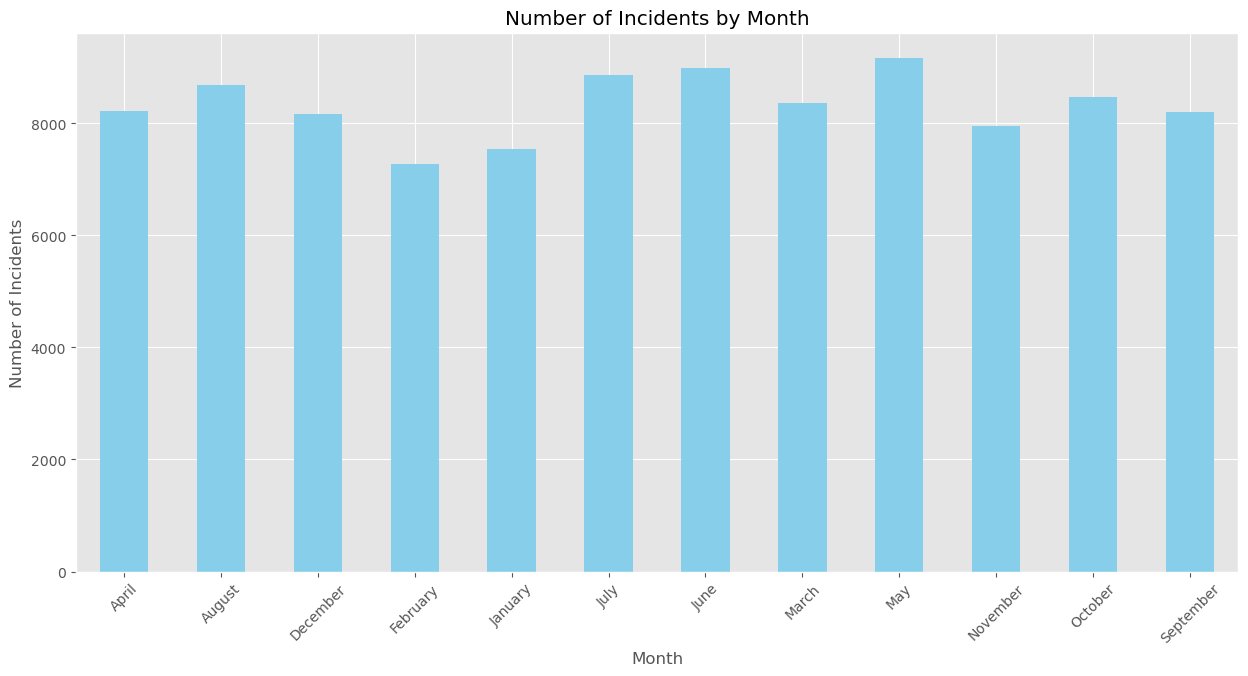

In [23]:
month_incidents = crime_df['Month'].value_counts().sort_index()

month_incidents.plot(kind='bar', color='skyblue')

plt.title('Number of Incidents by Month')
plt.xlabel('Month')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.show()

### Merging data 

There might be scenarios where you have two different sources for your data and you wish to combine them for analysis and modeling.

A join is a way to connect rows in two different data tables/frames based on some criteria. Let's look at a simple example of how to join to data frames.

In our original 2016 CMPD incident dataset the police division where an incident is reported is indicated using the Division number. We have another dataset with the mapping between division numbers and their names.
Let's bring this dataset in:

In [24]:
df2 =  pd.read_csv('cmpd_divisions.csv')
df2

,division_number,division_name
0,28,Airport Division
1,1,Central Division
2,6,Eastway Division
3,27,Freedom Division
4,12,Hickory Grove Division
5,17,Independence Division
6,2,Metro Division
7,11,North Division
8,7,North Tryon Division
9,16,Providence Division


We notice that the common column/field does not have the same name. Let's fix that by updating one of the dataframes column names:

In [25]:
df2.rename(columns={'division_number': 'Division'},inplace=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Division       15 non-null     int64 
 1   division_name  15 non-null     object
dtypes: int64(1), object(1)
memory usage: 372.0+ bytes


In [26]:
# this will cause an error
result = pd.merge(crime_df, df2, how='left', on='Division')

ValueError: You are trying to merge on object and int64 columns. If you wish to proceed you should use pd.concat

The problem is caused by different data types. The key variable is a string in one dataframe, and int64 in another one. Let's fix this error by changing the datatype for the Division column to a string:

In [27]:
df2['Division']= df2['Division'].astype(str)

Now we can merge the two data frames using the Division column

In [28]:
merged_df = pd.merge(crime_df, df2, how='left', on='Division')
merged_df

,Complaint_No,Block_No,Direction,Street_Name,Street_Type,Suffix,Apt_No,City,State,Zipcode,...,Incident_to_Time,Place1,Place2,Clearance_Status,Clearance_Date,Case_Status,Reporting_Agency,NIBRS_Hi_Class,Month,division_name
0,2.020000e+13,2219,,HEATHER GLEN,LN,,,CHARLOTTE,NC,28208,...,2330.0,Residential,Private Residence ...,Open ...,,Further Investigation,Charlotte-Mecklenburg Police Department,Motor Vehicle Theft,January,Freedom Division
1,2.020000e+13,8120,E,W T HARRIS,BV,,,CHARLOTTE,NC,28215,...,NaN,Open Area,Street/Highway ...,Open ...,,Inactive,Charlotte-Mecklenburg Police Department,Hit And Run (Property Only),January,Hickory Grove Division
2,2.020000e+13,1415,,TOM HUNTER,RD,,220,CHARLOTTE,NC,28213,...,NaN,Commercial Place,Hotel/Motel ...,Normal Clearance - Cleared by Arrest ...,1/1/16,Close/Cleared,Charlotte-Mecklenburg Police Department,Simple Assault,January,North Tryon Division
3,2.020000e+13,,,ORR,RD,,58,CHARLOTTE,NC,,...,6.0,Residential,Mobile Home/Houseboat ...,Open ...,,Inactive,Charlotte-Mecklenburg Police Department,Aggravated Assault,January,North Tryon Division
4,2.020000e+13,6500,N,TRYON,ST,,,CHARLOTTE,NC,28213,...,6.0,Open Area,Street/Highway ...,Open ...,,Inactive,Charlotte-Mecklenburg Police Department,Aggravated Assault,January,North Tryon Division
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106998,2.020000e+13,118,S,CHURCH,ST,,,CHARLOTTE,NC,28202,...,2340.0,Commercial Place,Other - Commercial Place ...,Open ...,,Inactive,Charlotte-Mecklenburg Police Department,Robbery,December,Central Division
106999,2.020000e+13,7321,N,TRYON,ST,,,CHARLOTTE,NC,28213,...,2342.0,Commercial Place,Bar/Tavern/Nightclub ...,Open ...,,Inactive,Charlotte-Mecklenburg Police Department,Theft From Motor Vehicle,December,University City Division
107000,2.020000e+13,3826,,MOSSCROFT,LN,,,CHARLOTTE,NC,28215,...,2325.0,Residential,Private Residence ...,Open ...,,Further Investigation,Charlotte-Mecklenburg Police Department,Theft From Motor Vehicle,December,University City Division
107001,2.020000e+13,2811,,CLYDE,DR,,,CHARLOTTE,NC,28208,...,NaN,Residential,Private Residence ...,Open ...,,Inactive,Charlotte-Mecklenburg Police Department,Damage/Vandalism Of Property,December,Metro Division
